### Import Libraries

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### Load & Prepare data

In [2]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
X_data = iris.data 
Y_data = pd.get_dummies(iris.target).values
Y_data[-2:]

array([[0, 0, 1],
       [0, 0, 1]], dtype=uint8)

### SPlit Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X_data, Y_data,
                                               random_state=10, test_size=.20)

In [7]:
xtrain.shape

(120, 4)

### Define Hyperparameters

In [8]:
n_hidden1 = 4
n_hidden2 = 4
n_hidden3 = 4
n_input = 4
n_output = 3

In [9]:
X = tf.placeholder('float', [None, n_input])
Y = tf.placeholder('float', [None, n_output])

### Build Neura Network

In [10]:
def neural_network_model(data):
    h1_layer = {'weight':tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'biases':tf.Variable(tf.random_normal([n_hidden1]))}
    
    h2_layer = {'weight':tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'biases':tf.Variable(tf.random_normal([n_hidden2]))}
    
    h3_layer = {'weight':tf.Variable(tf.random_normal([n_hidden2, n_hidden3])),
        'biases':tf.Variable(tf.random_normal([n_hidden3]))}
    
    output_layer = {'weight':tf.Variable(tf.random_normal([n_hidden3, n_output])),
                   'biases':tf.Variable(tf.random_normal([n_output]))}

    #Submission
    L1 = tf.add(tf.matmul(data, h1_layer['weight']), h1_layer['biases'])
    #Activation
    L1 = tf.nn.relu(L1)
    
    L2 = tf.add(tf.matmul(L1, h2_layer['weight']), h2_layer['biases'])
    L2 = tf.nn.relu(L2)
    
    L3 = tf.add(tf.matmul(L2, h3_layer['weight']), h3_layer['biases'])
    L3  = tf.nn.relu(L3)
    
    output = tf.add(tf.matmul(L3, output_layer['weight']), output_layer['biases'])
    
    return output

In [11]:
logits = neural_network_model(X)

### Cost Function

In [12]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Opimizer (to reduce cost)

In [13]:
optimizer = tf.train.GradientDescentOptimizer(.01).minimize(cost)
prediction = tf.nn.softmax(logits)

In [14]:
are_same = tf.equal(tf.argmax(prediction,1), tf.argmax(Y,1))

In [15]:
accuracy=tf.reduce_mean(tf.cast(are_same,"float"))

### Run Graph

In [16]:
init = tf.global_variables_initializer()
loss = []
acc = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(2001):
        _, c, a = sess.run([optimizer, cost, accuracy], feed_dict = {
            X:xtrain, Y:ytrain})
        loss.append(c)
        acc.append(a)
        if epoch%200==0:
            print("epoch: {} Cost:{} Accuracy:{}".format(epoch, c, a))
    
    print("\nTraining Finished!\n")
    
    test_cost, test_acc = sess.run([cost, accuracy], feed_dict = {X:xtest, Y:ytest})
    print("Testing Accuracy: {} Testing Loss: {}".format(test_acc, test_cost))

    p = sess.run(prediction, feed_dict = {X:xtest, Y:ytest})

epoch: 0 Cost:6.223011493682861 Accuracy:0.3083333373069763
epoch: 200 Cost:0.5842410922050476 Accuracy:0.6166666746139526
epoch: 400 Cost:0.43144553899765015 Accuracy:0.8333333134651184
epoch: 600 Cost:0.3001929521560669 Accuracy:0.925000011920929
epoch: 800 Cost:0.22126130759716034 Accuracy:0.9333333373069763
epoch: 1000 Cost:0.17379410564899445 Accuracy:0.9416666626930237
epoch: 1200 Cost:0.14663349092006683 Accuracy:0.9583333134651184
epoch: 1400 Cost:0.12891095876693726 Accuracy:0.9666666388511658
epoch: 1600 Cost:0.11703478544950485 Accuracy:0.9750000238418579
epoch: 1800 Cost:0.10864553600549698 Accuracy:0.9750000238418579
epoch: 2000 Cost:0.10226808488368988 Accuracy:0.9750000238418579

Training Finished!

Testing Accuracy: 0.8999999761581421 Testing Loss: 0.3048762381076813


In [17]:
p[0].argmax()

2

In [18]:
ytest[0].argmax()

1

### ANALYZE RESULTS

In [19]:
targets  = [t.argmax() for t in ytest]
predictions = [pr.argmax() for pr in p]
# targets

In [20]:
df = pd.DataFrame({"Actual":targets, "Prediction":predictions})
df.head()

Actual  Prediction
0       1           2
1       2           2
2       0           0
3       1           1
4       0           0

In [21]:
np.where(targets!=predictions)

(array([0], dtype=int64),)

### Plot training Loss

In [22]:
import matplotlib.pyplot as plt

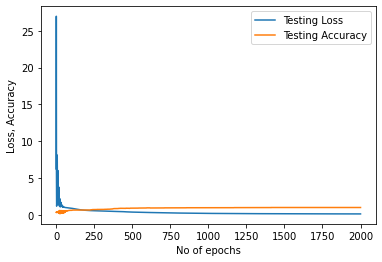

In [23]:
plt.plot(range(2001), loss)
plt.plot(range(2001), acc)
plt.legend(['Testing Loss', 'Testing Accuracy'])
plt.xlabel("No of epochs")
plt.ylabel("Loss, Accuracy")
plt.show()